In [ ]:
#import libraries-------
import cv2    #opencv
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [ ]:
#ASCII conversion--------
d={chr(i):i for i in range(255)}
c={i:chr(i) for i in range(255)}

In [ ]:
#Load Image-------
image_path=r"/content/inputimg.jpg"
x=cv2.imread(image_path)

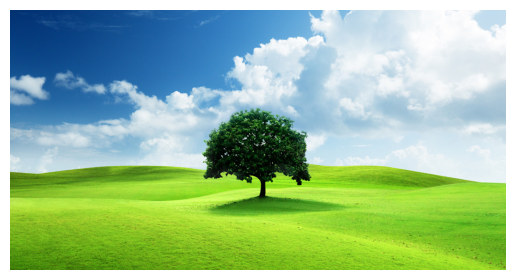

In [ ]:
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()

In [ ]:
print("Image Shape(Hight,Width,Channels):",x.shape)

Image Shape(Hight,Width,Channels): (630, 1200, 3)


In [ ]:
key="123"
text="secret"

In [ ]:
#ASCII value-------
text_ascii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


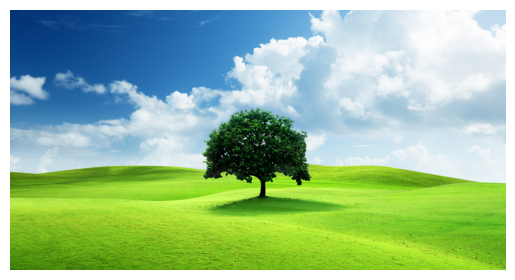

In [ ]:
#encrypt using pixel modification-----
x_enc=x.copy()
n,m,z=0,0,0
l=len(text)
kl=0
for i in range(l):
	orig_val=x_enc[n,m,z]
	new_val=d[text[i]]^d[key[kl]]
	x_enc[n,m,z]=new_val
	n+=1
	m+=1
	m=(m+1)%3
	z=(z+1)%3
	kl=(kl+1)%len(key)

cv2.imwrite("encrypt.jpg",x_enc)
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
#decrypt the image---------
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
        val=x_enc[n,m,z]
        orig_char=c[val^d[key[kl]]]
        decrypt+=orig_char
        n+=1
        m+=1
        m=(m+1)%3
        z=(z+1)%3
        kl=(kl+1)%len(key)
print(decrypt)

secret


In [ ]:
#LSB+AES Encryption method:

x_enc=x.copy()
n,m,z,kl=0,0,0,0


for i in range(l):
  char_val=encrypted_bytes[i]^d[key[kl]]
  for bit_pos in range(8):
    bit=(char_val>>(7-bit_pos))&1
    org_val=x_enc[n,m,z]
    # Use 0xFE to clear the last bit, ensuring the result is within uint8 range
    x_enc[n,m,z]= (org_val & 0xFE) | bit
    print(f"Embadding bit {bit} of '{encrypted_bytes[i]}' at ({n},{m},{z}) original={org_val} new={x_enc[n,m,z]}")
    z=(z+1)%3
    if z==0:
      m+=1
      if m==x_enc.shape[1]:
        m=0
        n+=1
  kl=(kl+1)%len(key)


cv2.imwrite("encrypt.jpg",x_enc)
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print("\nData successfully Hidden and saved as'encrypt.jpg'")